In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print(matplotlib.__version__)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


3.7.1


In [2]:
df = pd.read_csv('../files/carst.csv')
df.head(30)

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [3]:
df1 = pd.DataFrame(data = df)
c0 = df1['brand/model/year']
c1 = df1.cap_vol
c2 = df1.consumo
c3 = df1.power
c4 = df1.weight
c5 = df1.cemm
c6 = df1.nu_cy
c7 = df1.Etype

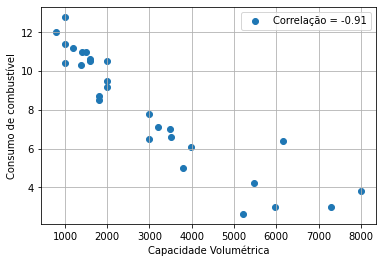

In [4]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(c1, c2, label=f'Correlação = {np.round(np.corrcoef(c1, c2)[0,1], 2)}')
plt.xlabel('Capacidade Volumétrica')
plt.ylabel('Consumo de combustível')
plt.legend()
plt.grid(True)
plt.show()

Estimated coefficients:
	B0 = 12.144010117932384
	B1 = -0.0013478460028317721


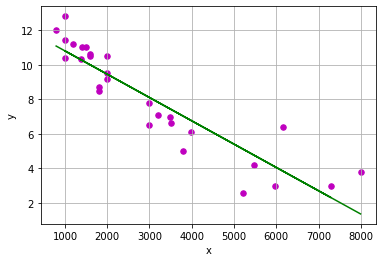

In [5]:
def estimate_coef(x, y):
    samples_qty = np.size(x)

    mean_x =np.mean(x)
    mean_y =np.mean(y)

    SS_xy = np.sum(y*x) - (samples_qty * mean_x * mean_y)
    SS_xx = np.sum(x*x) - (samples_qty * mean_x*mean_x)

    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1 * mean_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    plt.scatter(x, y, color='m', marker = 'o', s = 30)

    y_pred = b[0] + b[1] * x
    plt.plot(x, y_pred, color = 'g')

    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.grid(True)
    plt.show()

def main():
    x = df.cap_vol
    y = df.consumo

    b = estimate_coef(x, y)
    print(f'Estimated coefficients:\n\tB0 = {b[0]}\n\tB1 = {b[1]}')

    plot_regression_line(x, y, b)

if __name__ == '__main__':
    main()

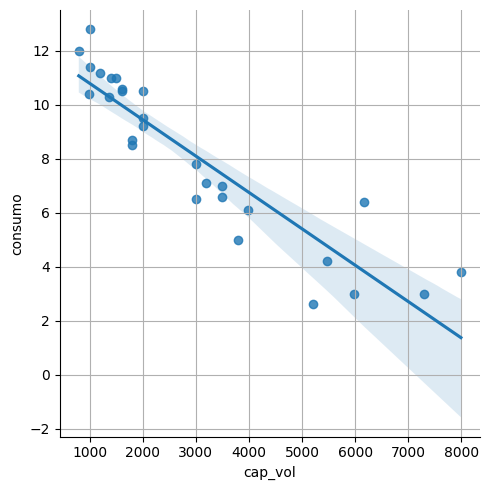

In [6]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
sns.lmplot(x='cap_vol', y='consumo', data=df)
plt.grid(True)

/home/eliabe/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eliabe/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


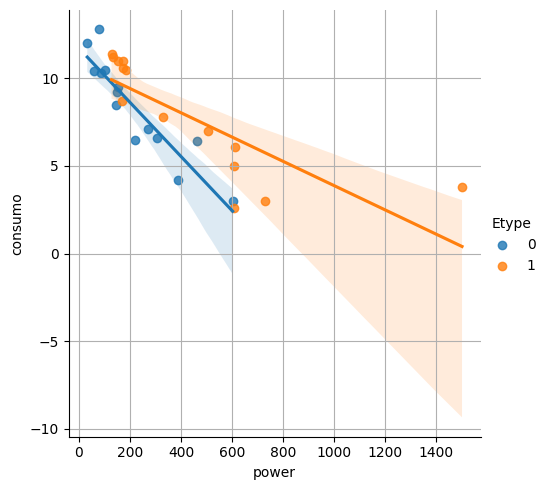

In [7]:
sns.lmplot(x='power', y='consumo', hue='Etype', data=df1)
plt.grid(True)

In [8]:
y = c2
x = c1
z = np.polyfit(x, y, 1)
print(f'y = {z[1]} {z[0]}x')

y = 12.144010117932384 -0.0013478460028317726x


In [9]:
import statsmodels.api as sm

y = df1.consumo
x = df1.cap_vol

x = sm.add_constant(x)

modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.30e-11
Time:                        16:28:29   Log-Likelihood:                -45.064
No. Observations:                  28   AIC:                             94.13
Df Residuals:                      26   BIC:                             96.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1440      0.427     28.435      0.0

In [10]:
dfmo = pd.DataFrame(modelo.summary().tables[1].data)

dfmo.columns = dfmo.iloc[0, :]
dfmo.index = dfmo.iloc[:, 0]
dfmo = dfmo.iloc[1:, 1:]
print(dfmo.iloc[:,[0, 1, 4, 5]])

0              coef    std err     [0.025     0.975]
                                                    
const       12.1440      0.427     11.266     13.022
cap_vol     -0.0013      0.000     -0.002     -0.001


In [11]:
# obtain y expected values
ychapeu = modelo.fittedvalues
# print(ychapeu)
dfy = pd.DataFrame(data=ychapeu)
dfy

,0
0,11.076516
1,10.804251
2,10.796164
3,10.300157
4,9.990152
5,9.723279
6,9.452362
7,9.449666
8,8.105863
9,7.834946


In [12]:
res = c2 - ychapeu
print(res)

0     0.923484
1    -0.404251
2     2.003836
3    -0.000157
4     0.509848
5    -1.223279
6     0.047638
7    -0.249666
8    -1.605863
9    -0.734946
10   -0.829245
11   -0.583423
12    2.561417
13    0.683135
14    0.602488
15    0.672057
16    0.741626
17    0.875063
18    0.609848
19   -1.020583
20    1.048986
21   -0.307211
22   -0.435984
23   -2.023543
24   -0.676887
25   -2.529820
26   -1.083891
27    2.429323
dtype: float64


In [13]:
square_res = res**2
print(square_res)

0     8.528225e-01
1     1.634190e-01
2     4.015358e+00
3     2.458187e-08
4     2.599448e-01
5     1.496411e+00
6     2.269412e-03
7     6.233309e-02
8     2.578798e+00
9     5.401463e-01
10    6.876469e-01
11    3.403825e-01
12    6.560857e+00
13    4.666735e-01
14    3.629918e-01
15    4.516609e-01
16    5.500098e-01
17    7.657356e-01
18    3.719143e-01
19    1.041590e+00
20    1.100372e+00
21    9.437881e-02
22    1.900821e-01
23    4.094727e+00
24    4.581765e-01
25    6.399987e+00
26    1.174820e+00
27    5.901610e+00
dtype: float64


Let's observe each of the values in a table
The first row has the actual value. The second, the expected value.
The third one has the residual value. And the fourth and last, the square residual value.

In [30]:
%pip install tabulate==0.9.0
from tabulate import tabulate
df_yo = pd.DataFrame(c2).T
df_ych = pd.DataFrame(dfy).T
df_ycho = pd.DataFrame(res).T
df_ycho2 = pd.DataFrame(square_res).T
table = [df_yo,df_ych,df_ycho,df_ycho2]
print(tabulate(table, headers='keys'))

Defaulting to user installation because normal site-packages is not writeable
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.8.5
    Uninstalling tabulate-0.8.5:
      Successfully uninstalled tabulate-0.8.5
Note: you may need to restart the kernel to use updated packages.


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().